In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras_radam import RAdam

Using TensorFlow backend.


In [2]:
# data

X = np.array([[1,2,3], [2,3,4], [3,4,5], [4,5,6]])
y = np.array([4,5,6,10])

In [3]:
# model making
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(3,1))) # default: tanh
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


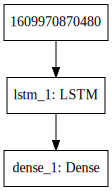

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
model.compile(loss='mse', optimizer=RAdam())

In [6]:
model.fit(X[:,:,np.newaxis], y, epochs=1000, verbose=False)

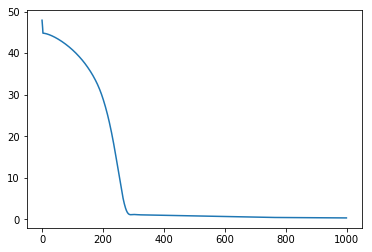

In [7]:
h = model.history.history

plt.plot(h['loss'])

In [8]:
model.predict(np.array([[5,6,7]]).reshape(1,3,1))

array([[12.354084]], dtype=float32)